### 참고자료
- 머신러닝 부트캠프 1장

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### 각종 정의

# x축의 정의 범위
x_max = 1
x_min = -1

# y축의 정의 범위
y_max = 2
y_min = -1

# 스케일, 1단위에 몇 점을 사용할지
SCALE = 50

# train/test에서 Test 데이터의 비율을 지정
TEST_RATE = 0.3

### 데이터 생성

data_x = np.arange(x_min, x_max, 1 / float(SCALE)).reshape(-1, 1)

data_ty = data_x ** 2 # 노이즈를 적용하기 전의 값
data_vy = data_ty + np.random.randn(len(data_ty), 1) * 0.5 # 노이즈를 적용한다

In [3]:
# 학습 데이터/테스트 데이터로 분할 (분류문제, 회귀문제에서 사용) 

def split_train_test(array):
    length = len(array)
    n_train = int(length * (1 - TEST_RATE))

    indices = list(range(length))
    np.random.shuffle(indices)
    idx_train = indices[:n_train]
    idx_test = indices[n_train:]

    return sorted(array[idx_train]), sorted(array[idx_test])

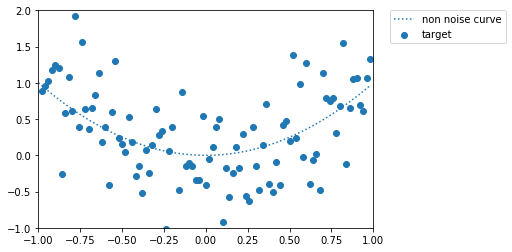

In [4]:
# 인덱스 스크립트를 분할
indices = np.arange(len(data_x)) # 인덱스 값의 목록
idx_train, idx_test = split_train_test(indices)

# 학습 데이터
x_train = data_x[idx_train]
y_train = data_vy[idx_train]

# 테스트 데이터
x_test = data_x[idx_test]
y_test = data_vy[idx_test]


### 그래프 그리기

# 분석 대상점의 산포도
plt.scatter(data_x, data_vy, label='target')

# 원래 선을 표시
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve')

# x축/y축 범위를 설정
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

#범례 표시 단위를 지정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#그래프를 표시
plt.show()

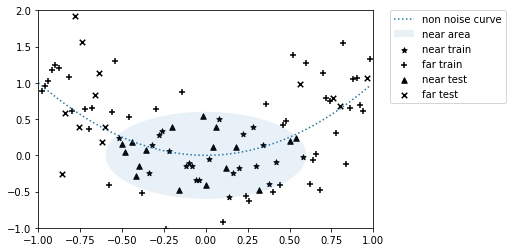

In [5]:
# 분류문제

### 분류 라벨 작성

# 클래스의 임계값. 원점으로부터의 반경
CLASS_RADIUS = 0.6

# 가까운/먼으로 클래스 나누기—가까우면 True, 멀면 False
labels = (data_x**2 + data_vy**2) < CLASS_RADIUS**2

# 학습 데이터/테스트 데이터로 분할
label_train = labels[idx_train] #학습 데이터
label_test = labels[idx_test]  #테스트 데이터


### 그래프 그리기

# 가까운/먼 클래스, 학습/테스트 2종류의 산포도를 겹친다

plt.scatter(x_train[label_train], y_train[label_train], c='black', s=30, marker='*', label='near train')
plt.scatter(x_train[label_train != True], y_train[label_train != True], c='black', s=30, marker='+', label='far train')

plt.scatter(x_test[label_test], y_test[label_test], c='black', s=30, marker='^', label='near test')
plt.scatter(x_test[label_test != True], y_test[label_test != True], c='black', s=30, marker='x', label='far test')

# 원래 선을 표시
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve')

# 클래스 분리 원
circle = plt.Circle((0,0), CLASS_RADIUS, alpha=0.1, label='near area')
ax = plt.gca()
ax.add_patch(circle)

# x축/y축의 범위를 설정
plt.xlim(x_min, x_max) # x축의 범위 설정
plt.ylim(y_min, y_max) # y축의 범위 설정

# 범례의 표시 위치를 지정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# 클래스를 표시
plt.show()


In [6]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score

data_train = np.c_[x_train, y_train]
data_test = np.c_[x_test, y_test]

# SVM 분류기를 작성, 학습
classifier = svm.SVC(gamma=1)
classifier.fit(data_train, label_train.reshape(-1))

# Test 데이터로 평가
pred_test = classifier.predict(data_test)

# Accuracy를 표시
print('accuracy_score:\n', accuracy_score(label_test.reshape(-1), pred_test))

# 혼동 행렬을 표시
print('Confusion matrix:\n', confusion_matrix(label_test.reshape(-1), pred_test))

########################################

accuracy_score:
 0.9333333333333333
Confusion matrix:
 [[13  0]
 [ 2 15]]


## 회귀문제

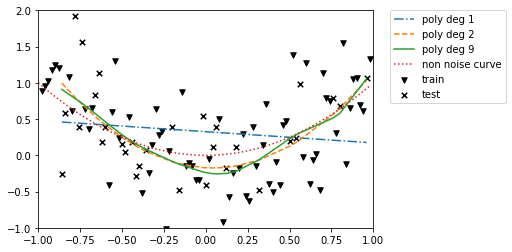

In [7]:
from sklearn import linear_model


### 1차식으로 회귀

# x값
X1_TRAIN = x_train
X1_TEST = x_test

# 학습
model = linear_model.LinearRegression()
model.fit(X1_TRAIN, y_train)

# 그래프로 그리기
plt.plot(x_test, model.predict(X1_TEST), linestyle='-.',label='poly deg 1')


### 2차식으로 회귀

# x 값
X2_TRAIN = np.c_[x_train**2, x_train]
X2_TEST = np.c_[x_test**2, x_test]

# 학습
model = linear_model.LinearRegression()
model.fit(X2_TRAIN, y_train)

# 그래프로 그리기
plt.plot(x_test, model.predict(X2_TEST), linestyle='--',label='poly deg 2')


### 9차식으로 회귀

# x 값
X9_TRAIN = np.c_[x_train**9, x_train**8, x_train**7, x_train**6,x_train**5,
x_train**4, x_train**3, x_train**2, x_train]
X9_TEST = np.c_[x_test**9, x_test**8, x_test**7, x_test**6, x_test**5,
x_test**4, x_test**3, x_test**2, x_test]
# 학습
model = linear_model.LinearRegression()
model.fit(X9_TRAIN, y_train)

# 그래프로 그리기
plt.plot(x_test, model.predict(X9_TEST), linestyle='-',label='poly deg 9')


### 데이터 표시
plt.scatter(x_train, y_train, c='black', s=30, marker='v',label='train')
plt.scatter(x_test, y_test, c='black', s=30, marker='x',label='test')

# 원래 선을 표시
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve')

# x축/y축의 범위를 설정
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 범례의 표시 위치를 지정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0)

# 그래프를 표시
plt.show()

# 클러스터링

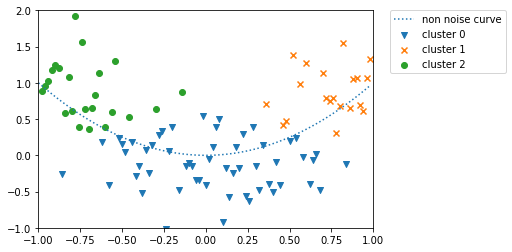

In [8]:
from sklearn import cluster

# x, y 데이터를 결합
data = np.c_[data_x, data_vy]

# 학습-> 3개의 그래프로 분류
model = cluster.KMeans(n_clusters=3)
model.fit(data)

# data 분류 결과（0～(n_clusters - 1)의 번호가 붙어 있다）
labels = model.labels_

plt.scatter(data_x[labels == 0], data_vy[labels == 0], marker='v', label='cluster 0')
plt.scatter(data_x[labels == 1], data_vy[labels == 1], marker='x', label='cluster 1')
plt.scatter(data_x[labels == 2], data_vy[labels == 2], marker='o', label='cluster 2')

# 원래 선을 표시
plt.plot(data_x, data_ty, linestyle=':', label='non noise curve')

# x축/y축의 범위를 설정
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 범례의 표시 위치를 지정
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0)

# 그래프를 표시